In [1]:
#Import library pandas dan prophet
import pandas as pd
from prophet import Prophet

#Baca dan tampilkan dataset 'sales.csv' menggunakan read_csv dari library pandas.
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/sales.csv')

#Tampilkan dataframe sales.csv
print(df)



/home/kevinpnjt/olah/env311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


             trx_id    product_id    trx_date  units
0        DQTrx00001  DQProduk-004  2024-01-01      1
1        DQTrx00002  DQProduk-001  2024-01-01      1
2        DQTrx00003  DQProduk-008  2024-01-01      1
3        DQTrx00004  DQProduk-007  2024-01-01      1
4        DQTrx00005  DQProduk-018  2024-01-01      1
...             ...           ...         ...    ...
829257  DQTrx829258  DQProduk-019  2025-09-30      1
829258  DQTrx829259  DQProduk-035  2025-09-30      1
829259  DQTrx829260  DQProduk-019  2025-09-30      1
829260  DQTrx829261  DQProduk-002  2025-09-30      2
829261  DQTrx829262  DQProduk-006  2025-09-30      1

[829262 rows x 4 columns]


In [2]:
# Import library pandas dan prophet
import pandas as pd
from prophet import Prophet

# Baca dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

# Agregasi tabel dalam bentuk total penjualan per hari
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

# Ubah tipe data kolom waktu menjadi datetime
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

# Ubah nama kolom agar sesuai format Prophet
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

# Tampilkan dataframe 'prophet_df'
print(prophet_df.head())


          ds     y
0 2024-01-01  1485
1 2024-01-02  1406
2 2024-01-03   750
3 2024-01-04   960
4 2024-01-05  1370


In [3]:
df

,trx_id,product_id,trx_date,units
0,DQTrx00001,DQProduk-004,2024-01-01,1
1,DQTrx00002,DQProduk-001,2024-01-01,1
2,DQTrx00003,DQProduk-008,2024-01-01,1
3,DQTrx00004,DQProduk-007,2024-01-01,1
4,DQTrx00005,DQProduk-018,2024-01-01,1
...,...,...,...,...
829257,DQTrx829258,DQProduk-019,2025-09-30,1
829258,DQTrx829259,DQProduk-035,2025-09-30,1
829259,DQTrx829260,DQProduk-019,2025-09-30,1
829260,DQTrx829261,DQProduk-002,2025-09-30,2


In [4]:
# log yang dihasilkan oleh library Prophet sebagai error.
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library pandas dan prophet
import pandas as pd
from prophet import Prophet

# Baca dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

# Agregasi tabel dalam bentuk total penjualan per hari
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

# Ubah tipe data kolom waktu menjadi datetime
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

# Ubah nama kolom agar sesuai format Prophet (ds untuk tanggal, y untuk target)
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

# Definisikan model prophet
model = Prophet()

# Training model prophet
model.fit(prophet_df)


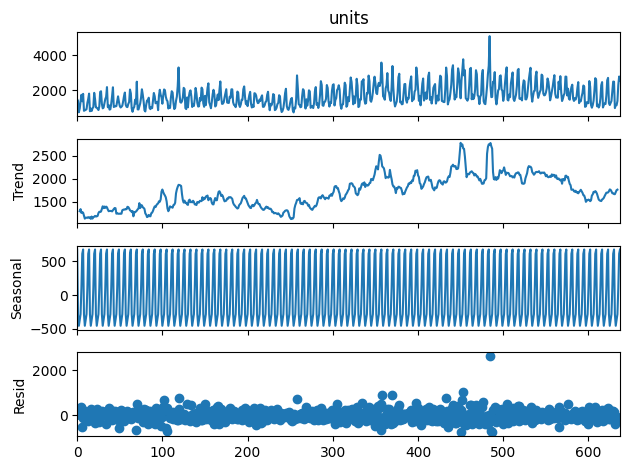

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekomposisi additive (Observed = Trend + Seasonality + Residual)
result = seasonal_decompose(sales_by_date['units'], model='additive', period=7)

# Plot hasil dekomposisi
result.plot()
plt.show()


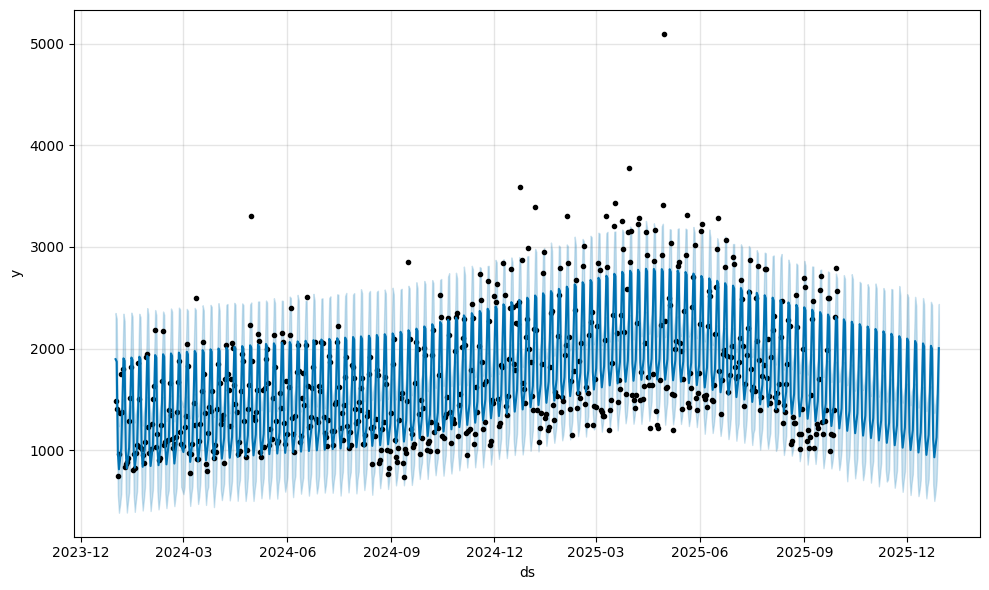

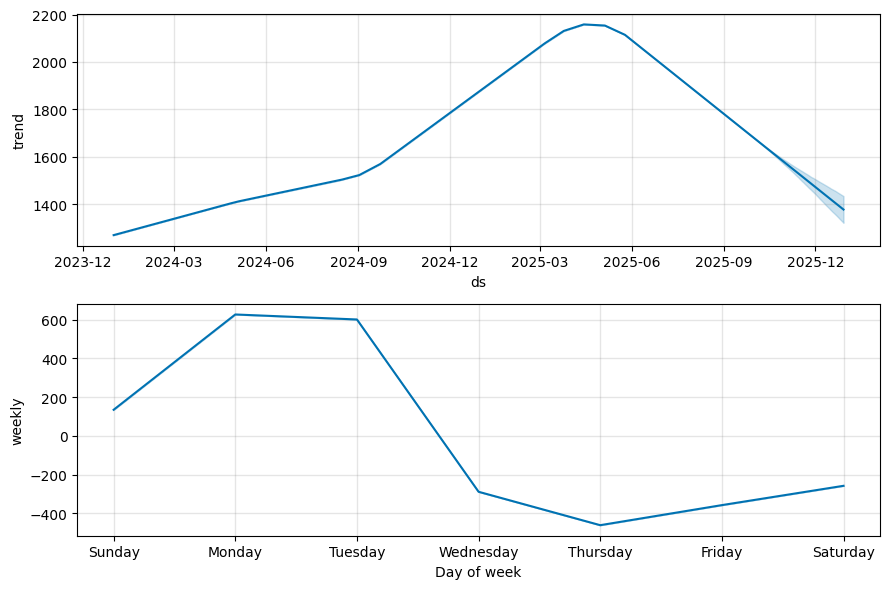

In [6]:
# Membuat dataframe untuk periode waktu ke depan (misalnya 90 hari)
future = model.make_future_dataframe(periods=90)

# Forecasting
forecast = model.predict(future)

# Tampilkan grafik hasil forecast
fig1 = model.plot(forecast)

# Tampilkan grafik komponen (trend, weekly, yearly, dll.)
fig2 = model.plot_components(forecast)


            ds         yhat   yhat_lower   yhat_upper
658 2025-10-21  2211.216493  1774.601798  2669.622503
659 2025-10-22  1319.029440   878.915319  1712.246841
660 2025-10-23  1143.312776   746.937679  1551.846229
661 2025-10-24  1243.425178   824.853806  1661.510143
662 2025-10-25  1339.660876   918.332414  1770.230240
663 2025-10-26  1728.519489  1289.869114  2126.316800
664 2025-10-27  2216.736596  1782.341066  2628.626544
665 2025-10-28  2187.535596  1751.779136  2622.424429
666 2025-10-29  1295.348543   873.274496  1758.012372
667 2025-10-30  1119.631879   700.544687  1545.262184


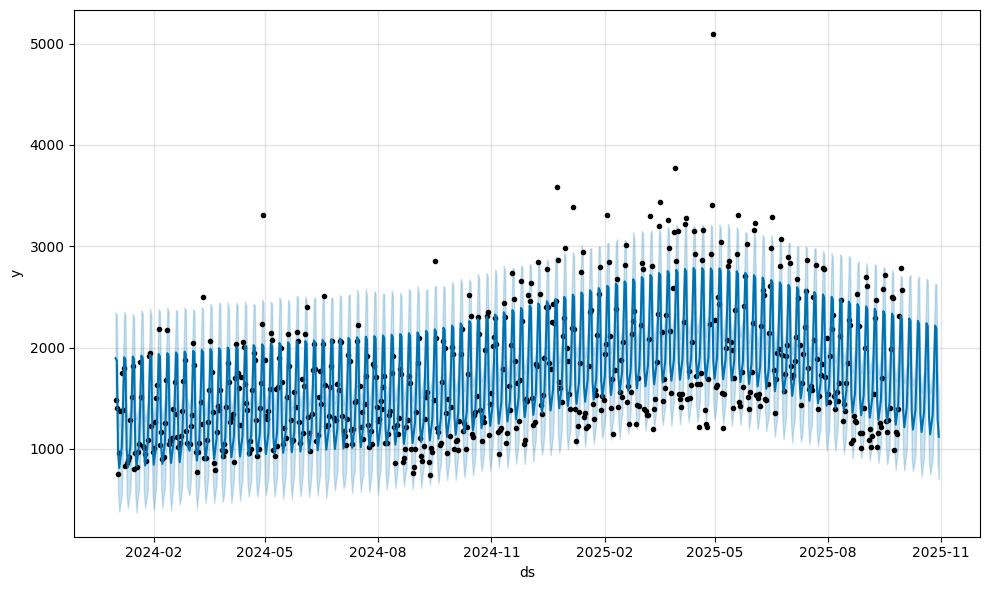

In [7]:
# log yang dihasilkan oleh library Prophet sebagai error.
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Baca dan tampilkan dataset “sales.csv” menggunakan read_csv dari library pandas.
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

# Agregasi tabel dalam bentuk total penjualan per hari dan simpan ke dataframe baru dengan nama “sales_by_date”
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

# Ubah tipe data kolom waktu menjadi tipe waktu
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

# Ubah nama kolom waktu menjadi “ds” dan nama kolom nilai menjadi “y”, simpan hasilnya ke dataframe baru dengan nama “prophet_df”
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

# Definisikan model prophet dan simpan dalam variable ‘model’
model = Prophet()

# Training model prophet dengan data yang sudah dirapikan dengan menggunakan atribut .fit
model.fit(prophet_df)

# Buat future dataframe untuk 30 hari ke depan
future = model.make_future_dataframe(periods=30)

# Forecasting
prediction = model.predict(future)

# Tampilkan hasil prediksi (beberapa baris terakhir)
print(prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# Plot hasil forecast
fig1 = model.plot(prediction)
plt.show()


In [8]:
# log yang dihasilkan oleh library Prophet sebagai error.
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

#Baca dan tampilkan dataset “sales.csv” menggunakan read_csv dari library pandas.
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

#Agregasi tabel dalam bentuk total penjualan per hari dan simpan ke dataframe baru dengan nama “sales_by_date”
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

#Ubah tipe data kolom waktu menjadi tipe waktu
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

#Ubah nama kolom waktu menjadi “ds” dan nama kolom nilai menjadi “y”, simpan hasilnya ke dataframe baru dengan nama “prophet_df”
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

#Definisikan model prophet dan simpan dalam variable ‘model’
model = Prophet()

#Training model prophet dengan data yang sudah dirapikan dengan menggunakan atribut .fit
model.fit(prophet_df)

# Buat future dataframe untuk 30 hari ke depan
future = model.make_future_dataframe(periods=30)

# Forecasting
prediction = model.predict(future)

#Gunakan model.make_future_dataframe(periods=7, freq=’D’) untuk membuat dataframe waktu masa depan dan simpan tabel tersebut dalam variabel future
future = model.make_future_dataframe(periods=7, freq='D')


# Tampilkan dataframe future menggunakan print
print(future)


            ds
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
..         ...
640 2025-10-03
641 2025-10-04
642 2025-10-05
643 2025-10-06
644 2025-10-07

[645 rows x 1 columns]


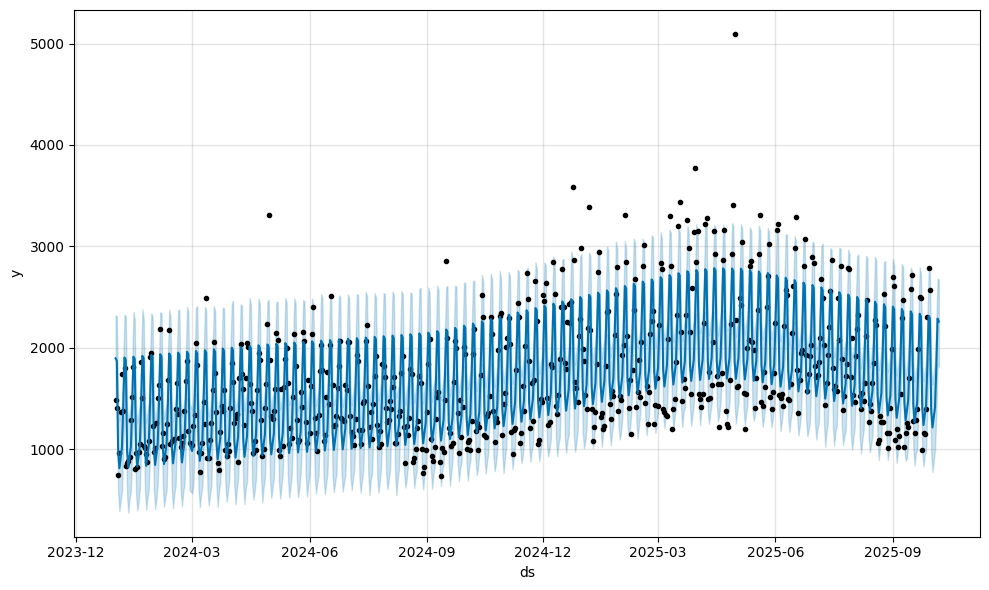

In [9]:
# log yang dihasilkan oleh library Prophet sebagai error.
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

#Baca dan tampilkan dataset “sales.csv” menggunakan read_csv dari library pandas.
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

#Agregasi tabel dalam bentuk total penjualan per hari dan simpan ke dataframe baru dengan nama “sales_by_date”
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

#Ubah tipe data kolom waktu menjadi tipe waktu
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

#Ubah nama kolom waktu menjadi “ds” dan nama kolom nilai menjadi “y”, simpan hasilnya ke dataframe baru dengan nama “prophet_df”
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

#Definisikan model prophet dan simpan dalam variable ‘model’
model = Prophet()

#Training model prophet dengan data yang sudah dirapikan dengan menggunakan atribut .fit
model.fit(prophet_df)

# Buat future dataframe untuk 30 hari ke depan
future = model.make_future_dataframe(periods=30)

# Forecasting
prediction = model.predict(future)

#Gunakan model.make_future_dataframe(periods=7, freq=’D’) untuk membuat dataframe waktu masa depan dan simpan tabel tersebut dalam variabel future
future = model.make_future_dataframe(periods=7, freq='D')

#Lakukan forecasting lagi namun dengan menggunakan dataframe yang baru dibuat
future_prediction = model.predict(future)

#Tampilkan hasil forecasting
fig = model.plot(future_prediction)
plt.show()


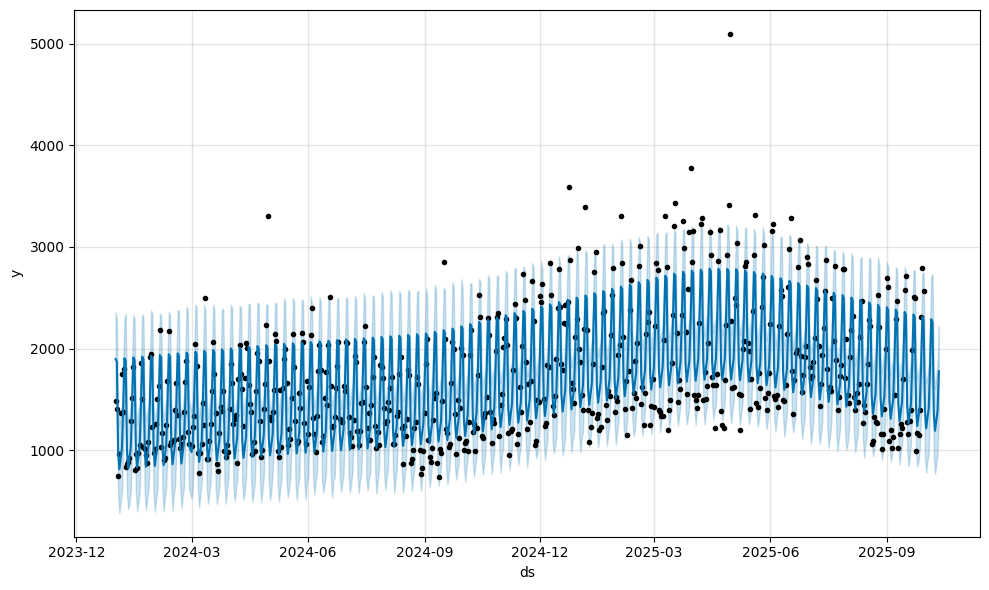

In [12]:
# log yang dihasilkan oleh library Prophet sebagai error.
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

#Baca dan tampilkan dataset “sales.csv” menggunakan read_csv dari library pandas.
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

#Agregasi tabel dalam bentuk total penjualan per hari dan simpan ke dataframe baru dengan nama “sales_by_date”
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

#Ubah tipe data kolom waktu menjadi tipe waktu
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

#Ubah nama kolom waktu menjadi “ds” dan nama kolom nilai menjadi “y”, simpan hasilnya ke dataframe baru dengan nama “prophet_df”
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

#Definisikan model prophet dan simpan dalam variable ‘model’
model = Prophet()

#Training model prophet dengan data yang sudah dirapikan dengan menggunakan atribut .fit
model.fit(prophet_df)

# Buat future dataframe untuk 30 hari ke depan
future = model.make_future_dataframe(periods=30)

# Forecasting
prediction = model.predict(future)

#Gunakan model.make_future_dataframe(periods=7, freq=’D’) untuk membuat dataframe waktu masa depan dan simpan tabel tersebut dalam variabel future
future = model.make_future_dataframe(periods=12, freq='D')

#Lakukan forecasting lagi namun dengan menggunakan dataframe yang baru dibuat
future_prediction = model.predict(future)

#Tampilkan hasil forecasting
fig = model.plot(future_prediction)
plt.show()


           ds      y
0  2024-01-07   9096
1  2024-01-14   8102
2  2024-01-21   8285
3  2024-01-28   8374
4  2024-02-04   9560
..        ...    ...
87 2025-09-07  11279
88 2025-09-14  11116
89 2025-09-21  12398
90 2025-09-28  12002
91 2025-10-05   5357

[92 rows x 2 columns]


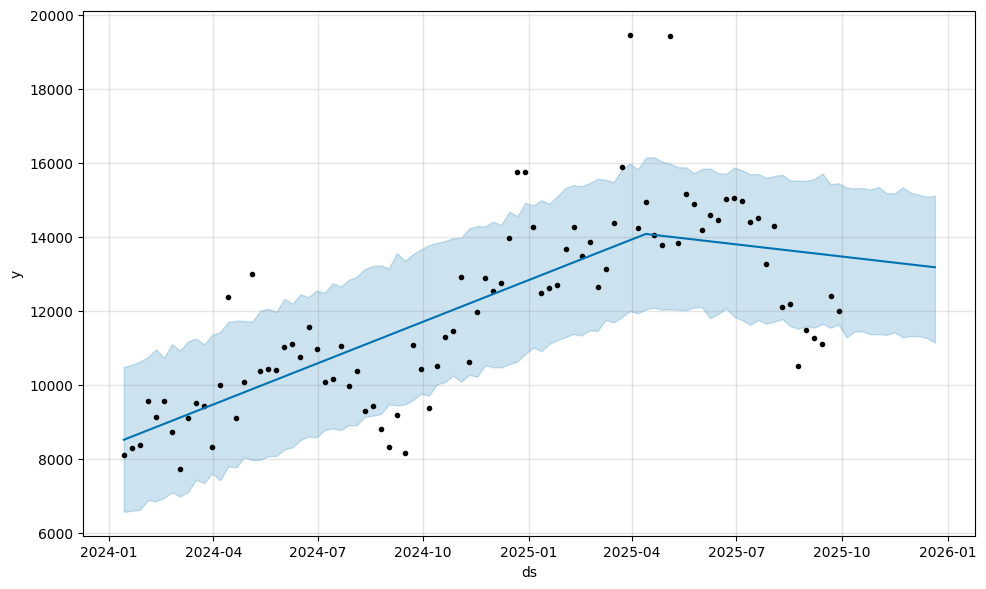

In [13]:
# log yang dihasilkan oleh library Prophet sebagai error.
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

#Baca dan tampilkan dataset “sales.csv” menggunakan read_csv dari library pandas.
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

#Agregasi tabel dalam bentuk total penjualan per hari dan simpan ke dataframe baru dengan nama “sales_by_date”
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

#Ubah tipe data kolom waktu menjadi tipe waktu
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

#Ubah nama kolom waktu menjadi “ds” dan nama kolom nilai menjadi “y”, simpan hasilnya ke dataframe baru dengan nama “prophet_df”
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

#Definisikan model prophet dan simpan dalam variable ‘model’
model = Prophet()

#Training model prophet dengan data yang sudah dirapikan dengan menggunakan atribut .fit
model.fit(prophet_df)

# Buat future dataframe untuk 30 hari ke depan
future = model.make_future_dataframe(periods=30)

# Forecasting
prediction = model.predict(future)

#Gunakan model.make_future_dataframe(periods=7, freq='D') untuk membuat dataframe waktu masa depan dan simpan tabel tersebut dalam variabel future
future = model.make_future_dataframe(periods=7, freq='D')

#Lakukan forecasting lagi namun dengan menggunakan dataframe yang baru dibuat
future_prediction = model.predict(future)

# ---- Model mingguan ----
weekly_prophet_df = prophet_df.resample('W', on='ds')['y'].sum().reset_index()
print(weekly_prophet_df)

# Opsional: buang baris pertama & terakhir
weekly_prophet_df = weekly_prophet_df.iloc[1:-1, :]

# Definisikan model Prophet (pakai kurung!)
weekly_model = Prophet()
weekly_model.fit(weekly_prophet_df)
# Buat future dataframe mingguan (misalnya 12 minggu ke depan)
weekly_future = weekly_model.make_future_dataframe(periods=12, freq='W')

# Forecast mingguan
weekly_prediction = weekly_model.predict(weekly_future)

# Plot hasil forecast mingguan
fig = weekly_model.plot(weekly_prediction)
plt.show()



# Interpretasi Hasil

## 1. Trajektori dan Tren Model
Garis solid berwarna **biru** merepresentasikan proyeksi model atau nilai estimasi, yang menunjukkan tren sentral dari deret waktu.  
Analisis menunjukkan adanya fase **pertumbuhan eksponensial** dari awal tahun **2024** hingga pertengahan **2025**.  
Setelah mencapai titik puncaknya, trajektori model menunjukkan adanya **deselerasi** dan transisi ke fase **plateau** atau bahkan regresi minor menjelang akhir periode prognosis.  

➡️ Pergeseran ini mengindikasikan bahwa laju pertumbuhan yang diobservasi di masa lalu **tidak diproyeksikan berlanjut** pada periode mendatang.

---

## 2. Interval Kepercayaan dan Prediksi
Area berwarna **biru muda** di sekitar garis proyeksi adalah **interval kepercayaan (confidence interval)** atau **interval prediksi**.  
Area ini merefleksikan tingkat **ketidakpastian (uncertainty)** dari estimasi model.  

- Pada periode awal, interval ini relatif **sempit**, menunjukkan presisi prognosis yang tinggi.  
- Seiring semakin jauhnya proyeksi dari data observasi, lebar interval **meningkat signifikan**.  

📌 Ini merupakan karakteristik lazim dalam pemodelan deret waktu, di mana **ketidakpastian prediksi meningkat** seiring dengan perpanjangan horizon waktu.

---

## 3. Data Historis dan Anomali
Titik-titik diskrit berwarna **hitam** merepresentasikan data observasi aktual yang menjadi dasar kalibrasi model.  
Distribusi titik-titik ini menunjukkan pola yang konsisten dengan tren yang diidentifikasi oleh model.  

⚠️ Terdapat beberapa **anomali (outlier)**, seperti titik data di sekitar **April 2025** yang berada di luar rentang nilai umum.  
Meskipun demikian, model prognosis telah dikalibrasi untuk mengikuti **tren agregat** dan **tidak terlalu dipengaruhi** oleh fluktuasi ekstrem atau data anomali tunggal.

---

## 📊 Kesimpulan
Secara keseluruhan, model ini memprediksi **pencapaian puncak pertumbuhan** diikuti oleh fase **stabilisasi atau regresi ringan**, dengan **ketidakpastian meningkat** secara eksponensial seiring perpanjangan waktu proyeksi.


In [15]:
# log yang dihasilkan oleh library Prophet sebagai error.
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Baca dan tampilkan dataset “sales.csv” menggunakan read_csv dari library pandas.
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

# Agregasi tabel dalam bentuk total penjualan per hari dan simpan ke dataframe baru dengan nama “sales_by_date”
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

# Ubah tipe data kolom waktu menjadi tipe waktu
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

# Ubah nama kolom waktu menjadi “ds” dan nama kolom nilai menjadi “y”, simpan hasilnya ke dataframe baru dengan nama “prophet_df”
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

# Definisikan model prophet dan simpan dalam variable ‘model’
model = Prophet()

# Training model prophet dengan data yang sudah dirapikan dengan menggunakan atribut .fit
model.fit(prophet_df)

# Buat future dataframe untuk 30 hari ke depan
future = model.make_future_dataframe(periods=30)

# Forecasting
prediction = model.predict(future)

# Gunakan model.make_future_dataframe(periods=7, freq='D') untuk membuat dataframe waktu masa depan dan simpan tabel tersebut dalam variabel future
future = model.make_future_dataframe(periods=7, freq='D')

# Lakukan forecasting lagi namun dengan menggunakan dataframe yang baru dibuat
future_prediction = model.predict(future)

# ---- Model mingguan ----
weekly_prophet_df = prophet_df.resample('W', on='ds')['y'].sum().reset_index()

# Opsional: buang baris pertama & terakhir
weekly_prophet_df = weekly_prophet_df.iloc[1:-1, :]

# Definisikan model Prophet (pakai kurung!)
weekly_model = Prophet()
weekly_model.fit(weekly_prophet_df)

# Buat future dataframe mingguan (misalnya 12 minggu ke depan)
weekly_future = weekly_model.make_future_dataframe(periods=12, freq='W')

# Forecast mingguan
weekly_prediction = weekly_model.predict(weekly_future)

# Buat Dataframe baru bernama weekly_combined yang berisi kolom bernama ‘ds’, ‘y_real’, ‘y_pred’, ’residual’, dan ’z_score’.
weekly_combined = pd.DataFrame(columns=['ds', 'y_real', 'y_pred', 'residual', 'z_score'])

# Assign kolom ‘ds’ di dataframe weekly_combined dengan isi di kolom ‘ds’ pada dataframe weekly_prophet_df 
weekly_combined['ds'] = weekly_prophet_df['ds'].reset_index(drop=True)

# Assign kolom ‘y_real’ di dataframe weekly_combined dengan isi di kolom ‘y’ pada dataframe weekly_prophet_df
weekly_combined['y_real'] = weekly_prophet_df['y'].reset_index(drop=True)

# Assign kolom ‘y_pred’ di dataframe weekly_combined dengan isi di kolom ‘yhat’ pada dataframe weekly_prediction
weekly_combined['y_pred'] = weekly_prediction['yhat'].reset_index(drop=True)

# Assign kolom ‘residual’ di dataframe weekly_combined dengan hasil pengurangan kolom ‘y_real’ dengan ‘y_pred’
weekly_combined['residual'] = weekly_combined['y_real'] - weekly_combined['y_pred']

# Hitung z-score dari residual
weekly_combined['z_score'] = (weekly_combined['residual'] - weekly_combined['residual'].mean()) / weekly_combined['residual'].std()

# Tampilkan dataframe weekly_combined
print(weekly_combined)


           ds  y_real        y_pred     residual   z_score
0  2024-01-14    8102   8515.716144  -413.716144 -0.268345
1  2024-01-21    8285   8601.334072  -316.334072 -0.205238
2  2024-01-28    8374   8686.952001  -312.952001 -0.203047
3  2024-02-04    9560   8772.569929   787.430071  0.510036
4  2024-02-11    9138   8858.187857   279.812143  0.181083
..        ...     ...           ...          ...       ...
85 2025-08-31   11471  13579.150799 -2108.150799 -1.366392
86 2025-09-07   11279  13554.141658 -2275.141658 -1.474607
87 2025-09-14   11116  13529.132518 -2413.132518 -1.564030
88 2025-09-21   12398  13504.123377 -1106.123377 -0.717047
89 2025-09-28   12002  13479.114236 -1477.114236 -0.957460

[90 rows x 5 columns]


## Deteksi Anomali sebuah Data 

Anomali Mingguan:
           ds  y_real        y_pred     residual   z_score
63 2025-03-30   19454  13908.120364  5545.879636  3.593661
68 2025-05-04   19427  14004.180072  5422.819928  3.513914


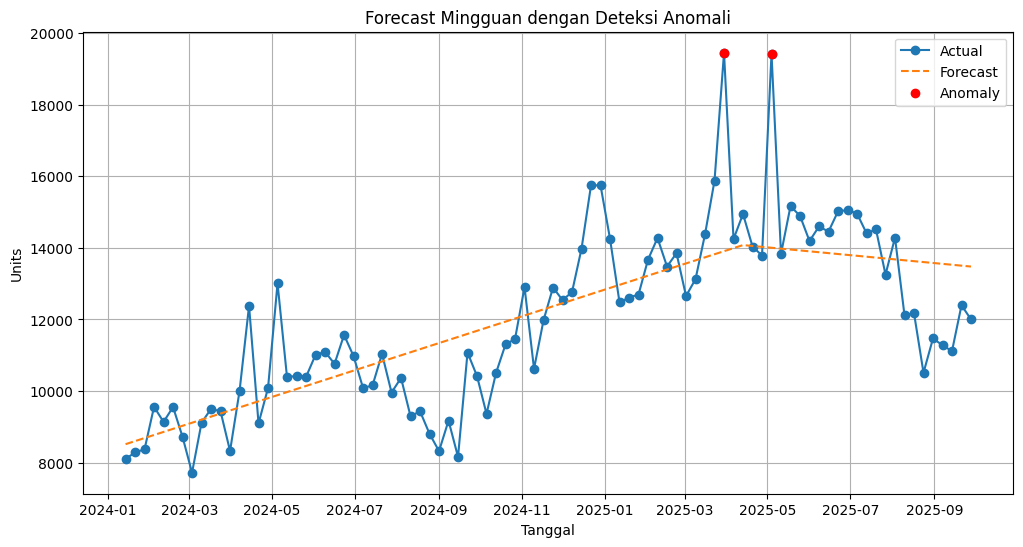

In [16]:
# Supaya log dari Prophet lebih bersih
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Baca dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

# 2. Agregasi total penjualan per hari
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

# 3. Ubah kolom trx_date menjadi datetime
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

# 4. Siapkan dataframe untuk Prophet
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

# 5. Definisikan dan latih model harian
model = Prophet()
model.fit(prophet_df)

# 6. Forecast 30 hari ke depan
future = model.make_future_dataframe(periods=30)
prediction = model.predict(future)

# 7. Forecast ulang untuk 7 hari ke depan
future = model.make_future_dataframe(periods=7, freq='D')
future_prediction = model.predict(future)

# ================================
# ===   MODEL MINGGUAN      ======
# ================================

# 8. Agregasi data mingguan dengan resample
weekly_prophet_df = prophet_df.resample('W', on='ds')['y'].sum().reset_index()

# Opsional: buang baris pertama & terakhir
weekly_prophet_df = weekly_prophet_df.iloc[1:-1, :]

# 9. Definisikan & latih model mingguan
weekly_model = Prophet()
weekly_model.fit(weekly_prophet_df)

# 10. Forecast 12 minggu ke depan
weekly_future = weekly_model.make_future_dataframe(periods=12, freq='W')
weekly_prediction = weekly_model.predict(weekly_future)

# ================================
# ===   DETEKSI ANOMALI     ======
# ================================

# 11. Gabungkan hasil real & prediksi
weekly_combined = pd.DataFrame()
weekly_combined['ds'] = weekly_prophet_df['ds'].reset_index(drop=True)
weekly_combined['y_real'] = weekly_prophet_df['y'].reset_index(drop=True)
weekly_combined['y_pred'] = weekly_prediction['yhat'].reset_index(drop=True)
weekly_combined['residual'] = weekly_combined['y_real'] - weekly_combined['y_pred']

# 12. Hitung rata-rata & standar deviasi residual
res_mean = weekly_combined['residual'].mean()
res_std = weekly_combined['residual'].std()

# 13. Hitung z-score
weekly_combined['z_score'] = (weekly_combined['residual'] - res_mean) / res_std

# 14. Deteksi anomali (abs > 3)
df_anomaly = weekly_combined[weekly_combined['z_score'].abs() > 3]

print("Anomali Mingguan:")
print(df_anomaly)

# ================================
# ===   VISUALISASI ANOMALI ======
# ================================
plt.figure(figsize=(12,6))
plt.plot(weekly_combined['ds'], weekly_combined['y_real'], label='Actual', marker='o')
plt.plot(weekly_combined['ds'], weekly_combined['y_pred'], label='Forecast', linestyle='--')

# Highlight anomali
plt.scatter(df_anomaly['ds'], df_anomaly['y_real'], color='red', label='Anomaly', zorder=5)

plt.xlabel("Tanggal")
plt.ylabel("Units")
plt.title("Forecast Mingguan dengan Deteksi Anomali")
plt.legend()
plt.grid(True)
plt.show()


           ds  y_real        y_pred     residual   z-score
63 2025-03-30   19454  13908.120364  5545.879636  3.593661
68 2025-05-04   19427  14004.180072  5422.819928  3.513914


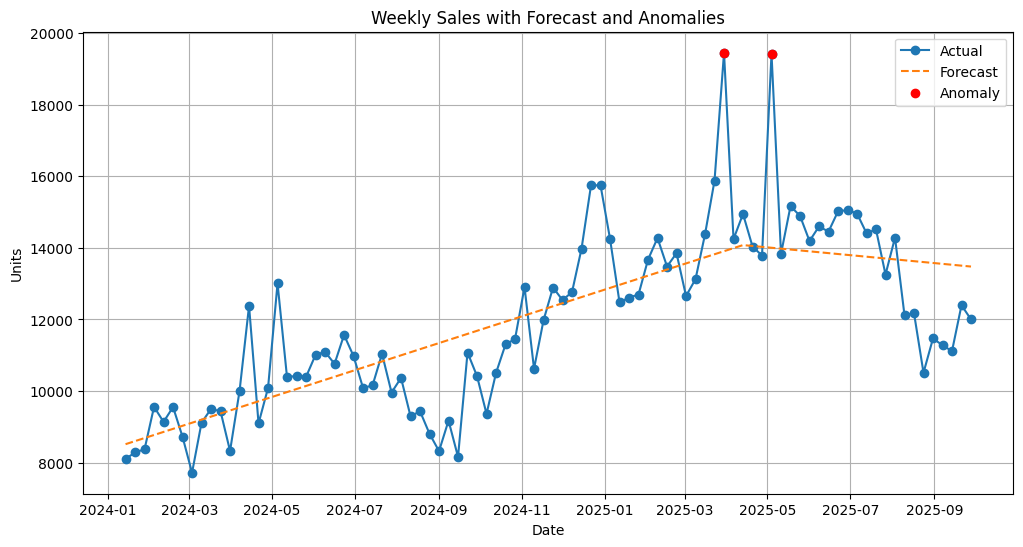

In [17]:
# Log yang dihasilkan oleh library Prophet sebagai error.
import logging
logging.getLogger('cmdstanpy').disabled = True

# Import library
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Baca dan tampilkan dataset “sales.csv” menggunakan read_csv dari library pandas.
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sales.csv")

# Agregasi tabel dalam bentuk total penjualan per hari dan simpan ke dataframe baru dengan nama “sales_by_date”
sales_by_date = df.groupby('trx_date')['units'].sum().reset_index()

# Ubah tipe data kolom waktu menjadi tipe waktu
sales_by_date["trx_date"] = pd.to_datetime(sales_by_date["trx_date"])

# Ubah nama kolom waktu menjadi “ds” dan nama kolom nilai menjadi “y”, simpan hasilnya ke dataframe baru dengan nama “prophet_df”
prophet_df = sales_by_date.rename(columns={'trx_date': 'ds', 'units': 'y'})

# Definisikan model prophet dan simpan dalam variable ‘model’
model = Prophet()

# Training model prophet dengan data yang sudah dirapikan dengan menggunakan atribut .fit
model.fit(prophet_df)

# Buat future dataframe untuk 30 hari ke depan
future = model.make_future_dataframe(periods=30)

# Forecasting
prediction = model.predict(future)

# Gunakan model.make_future_dataframe(periods=7, freq='D') untuk membuat dataframe waktu masa depan
future = model.make_future_dataframe(periods=7, freq='D')

# Lakukan forecasting lagi dengan dataframe baru
future_prediction = model.predict(future)

# ---- Model mingguan ----
# Agregasi data mingguan
weekly_prophet_df = prophet_df.resample('W', on='ds')['y'].sum().reset_index()

# Opsional: buang baris pertama & terakhir
weekly_prophet_df = weekly_prophet_df.iloc[1:-1, :]

# Definisikan model Prophet
weekly_model = Prophet()
weekly_model.fit(weekly_prophet_df)

# Buat future dataframe mingguan (12 minggu ke depan)
weekly_future = weekly_model.make_future_dataframe(periods=12, freq='W')

# Forecast mingguan
weekly_prediction = weekly_model.predict(weekly_future)

# Buat Dataframe baru bernama weekly_combined
weekly_combined = pd.DataFrame(columns=['ds', 'y_real', 'y_pred', 'residual', 'z-score'])

# Isi kolom dataframe
weekly_combined['ds'] = weekly_prophet_df['ds'].reset_index(drop=True)
weekly_combined['y_real'] = weekly_prophet_df['y'].reset_index(drop=True)
weekly_combined['y_pred'] = weekly_prediction['yhat'].reset_index(drop=True)
weekly_combined['residual'] = weekly_combined['y_real'] - weekly_combined['y_pred']

# Hitung rata-rata dan standar deviasi residual
res_mean = weekly_combined['residual'].mean()
res_std = weekly_combined['residual'].std()

# Hitung z-score
weekly_combined['z-score'] = (weekly_combined['residual'] - res_mean) / res_std

# Tentukan anomali (nilai absolut z-score > 3)
df_anomaly = weekly_combined[weekly_combined['z-score'].abs() > 3]

# Tampilkan dataframe anomali
print(df_anomaly)

# ---- Plotting ----
plt.figure(figsize=(12, 6))
plt.plot(weekly_combined['ds'], weekly_combined['y_real'], label='Actual', marker='o')
plt.plot(weekly_combined['ds'], weekly_combined['y_pred'], label='Forecast', linestyle='--')
plt.scatter(df_anomaly['ds'], df_anomaly['y_real'], color='red', label='Anomaly', zorder=5)
plt.xlabel('Date')
plt.ylabel('Units')
plt.title('Weekly Sales with Forecast and Anomalies')
plt.legend()
plt.grid(True)
plt.show()
